In [1]:
import trainExplainer
import trainExplainer_trainSplit
import sweepExplainerBACommunity
import sweepExplainerTreeGrid
import importlib
import datasetLoader
import evaluation
import torch
import explainer
import networks
import wandb

importlib.reload(trainExplainer_trainSplit)
importlib.reload(datasetLoader)
importlib.reload(explainer)

<module 'explainer' from 'c:\\Users\\trist\\Git_repos\\BT-ML-PGESAT\\code\\PGExplainer\\explainer.py'>

In [2]:
data = datasetLoader.loadOriginalNodeDataset("Tree-Cycles")

In [6]:
dataNew, labels = datasetLoader.loadGraphDataset('BA-2Motif')

### Sweep config BA-Shapes

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10]                  # 30 | 10 | 10     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 1.0 | 5.0     
            },
        'tT': {
            'values': [1.0, 2.0]            # 2.0 | 0.05 | 2.0     
            },
        'size_reg': {
            'values': [0.05]                # 0.05 | 0.05 | 0.05     
            },
        'entropy_reg': {
            'values': [0.1, 0.5]                # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003]               # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [1, 5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config Tree-Cycles

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [20]                  # 30 | 20 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 1.0     not annealing but increasing in rep
            },
        'tT': {
            'values': [1.0, 5.0]            # 2.0 | 5.0 | 5.0     
            },
        'size_reg': {
            'values': [0.0001, 0.1]                # 0.05 | 0.0001 | 0.1     TO BE CHECKED IN REP
            },
        'entropy_reg': {
            'values': [1.0]                # 1.0 | 0.01 | 10.0         TO BE CHECKED IN REP 
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.0003]       # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config Tree-Grid

In [5]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [30]                  # 30 | 30 | 30     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 5.0     
            },
        'tT': {
            'values': [2.0]            # 2.0 | 5.0 | 2.0     
            },
        'size_reg': {
            'values': [1.0, 0.5]                # 0.05 | 0.01 | 1.0     
            },
        'entropy_reg': {
            'values': [1.0]                # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.01]       # 0.003 | 0.01 | 0.003            
            },
        'sampled_graphs':{
            'values': [5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config BA-Community

In [4]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [20]                  # 30 | 20 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [1.0]                 # 5.0 | 1.0 | 1.0     
            },
        'tT': {
            'values': [1.0, 5.0]                 # 2.0 | 1.0 | 1.0     
            },
        'size_reg': {
            'values': [0.1, 0.05]           # 0.05 | 0.05 | 0.05     
            },
        'entropy_reg': {
            'values': [1.0]            # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003, 0.0003]       # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0, 0.5]                 # 0.0 | 0.5 | 0.5     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config BA-2Motif

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "minimize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10, 20]              # 30 | 10 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 1.0 | 5.0     
            },
        'tT': {
            'values': [1.0]                 # 2.0 | - | 1.0     
            },
        'size_reg': {
            'values': [0.03]                # 0.05 | 0.00 | 0.03   0.0003  
            },
        'entropy_reg': {
            'values': [0.01, 0.1, 1.0]                # 1.0 | 0.000 | 0.01   0.3 
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003, 0.005, 0.01]               # 0.003 | 0.003 | 0.005            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]               # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [64]              # ---   
            },
        'num_training_instances':{
            'values': [30]              # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config MUTAG

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10, 20]                  # 30 | 10 | 30     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 5.0     
            },
        'tT': {
            'values': [1.0, 5.0]            # 2.0 | 5.0/1.0 | 5.0     
            },
        'size_reg': {
            'values': [0.005]                # 0.05 | 0.01/0.005 | 0.005     
            },
        'entropy_reg': {
            'values': [0.1, 1.0]                # 1.0 | 0.01/1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.01, 0.003]       # 0.003 | 0.01 | 0.0003            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [64]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

In [ ]:
'L2_reg': {
            'values': [0.0, 0.01, 0.1, 1.0]
            },

In [6]:
sweep_id = wandb.sweep(sweep_config, project="SWEEP-Tree-Grid-FIXED-NUM-TRAINING-HIGHLR")

Create sweep with ID: izyhss40
Sweep URL: https://wandb.ai/tristan-schulz2001-tu-dortmund/SWEEP-Tree-Grid-FIXED-NUM-TRAINING-HIGHLR/sweeps/izyhss40


In [2]:
dataset="MUTAG"

In [9]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Community")
single_label = data.y
motifNodes = [i for i in range(400,700,5)]
#[400,700,5]
#[511,871,6]
#motifNodes = [i for i in range(single_label.shape[0]) if single_label[i] != 0 and single_label[i] != 4]
print(len(motifNodes)*0.08)

4.8


In [7]:
wandb.agent(sweep_id, sweepExplainerTreeGrid.trainExplainer)

wandb: Agent Starting Run: fasd6mkr with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 74
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:-0.00016792185488156974, 0.043154239654541016
Epoch 1, Loss: 0.8455331325531006
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.6313764996794579
roc_auc_score: 0.6313764996794579
Mean individual BinaryAUROC: 0.46066564321517944
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not com

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
train/Loss,█▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,▆███▇▇▇▆▄▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄▄▃▃▃
val/AUC,█▅▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/mean_ind_AUC,█▅▅▅▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: n90uygge with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 74
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:-0.00016792185488156974, 0.043154239654541016
Epoch 1, Loss: 0.6561118364334106
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.700018316695668
roc_auc_score: 0.700018316695668
Mean individual BinaryAUROC: 0.7154771089553833
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comput

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▆▃▂▂▂▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/Loss,██▇▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,█▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▅▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/mean_ind_AUC,█▅▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: 8vx5chsz with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 75
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.00023751975095365196, 0.043194420635700226
Epoch 1, Loss: 0.8650895357131958
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.3702720029306713
roc_auc_score: 0.37027200293067136
Mean individual BinaryAUROC: 0.17775163054466248
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not com

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▁▅▆▇▇▇████████████████████████
train/Loss,█▇▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,▁▆▇███████████████████████████
val/AUC,▁▅▇▇▇▇▇███████████████████████
val/mean_ind_AUC,▁▆▇███████████████████████████


wandb: Agent Starting Run: 2gt671tk with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 75
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.00023751975095365196, 0.043194420635700226
Epoch 1, Loss: 0.6661179661750793
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.33047898159172084
roc_auc_score: 0.33047898159172084
Mean individual BinaryAUROC: 0.370402067899704
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comp

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▁▂▆▇▇▇▇▇██████████████████████
train/Loss,█▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,▄▁▆▆▆▆▇▇██████████████████████
val/AUC,▁▃▆███████████████████████████
val/mean_ind_AUC,▂▁█▆▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄


wandb: Agent Starting Run: b6apvb1w with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 76
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.0006549620302394032, 0.042804840952157974
Epoch 1, Loss: 0.8772948980331421
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.726531733675245
roc_auc_score: 0.726531733675245
Mean individual BinaryAUROC: 0.5879403352737427
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computab

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▆▃▃▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/Loss,█▇▅▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▆▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/mean_ind_AUC,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: x04kaf0m with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 76
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.0006549620302394032, 0.042804840952157974
Epoch 1, Loss: 0.6792438626289368
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.6750618188478799
roc_auc_score: 0.6750618188478799
Mean individual BinaryAUROC: 0.6032631397247314
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comput

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▄█▆▅▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/Loss,█▇▆▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,▇█▆▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,▅█▆▅▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/mean_ind_AUC,▇█▅▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [3]:
# TODO: Probably best to load data here once and pass to each task?
importlib.reload(evaluation)

# Seed 74 and 75 achieve results 0/1
for i in range(74, 77):
    mlp, downstreamTask, testAUC, individual_aurocs_test, testInfTime = trainExplainer_trainSplit.trainExplainer(dataset=dataset, save_model=False, wandb_project="MUTAG-74-75-76-DEBUG-LOOP", runSeed=i)

"""MLP weights initialized:0.0003243635583203286, 0.09082738310098648
MLP weights initialized:0.0005468199960887432, 0.09090176224708557
MLP weights initialized:-4.145771981711732e-06, 0.09077146649360657             (THIS ACHIEVES WANTED ACC)"""

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tristan-schulz2001 (tristan-schulz2001-tu-dortmund) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


MLP weights initialized:0.0012494741240516305, 0.09379079937934875
pOriginal 0 tensor([[9.4721e-01, 5.2794e-02],
        [8.7422e-01, 1.2578e-01],
        [9.9746e-01, 2.5373e-03],
        [7.3376e-01, 2.6624e-01],
        [5.4744e-01, 4.5256e-01],
        [7.5364e-01, 2.4636e-01],
        [7.3477e-01, 2.6523e-01],
        [9.9981e-01, 1.8716e-04],
        [9.9076e-01, 9.2384e-03],
        [6.5712e-01, 3.4288e-01],
        [8.6674e-01, 1.3326e-01],
        [9.6719e-01, 3.2806e-02],
        [9.7681e-01, 2.3195e-02],
        [8.1450e-01, 1.8550e-01],
        [9.7602e-01, 2.3978e-02],
        [3.5580e-01, 6.4420e-01],
        [8.1421e-01, 1.8579e-01],
        [7.4068e-01, 2.5932e-01],
        [9.6913e-01, 3.0872e-02],
        [2.1587e-01, 7.8413e-01],
        [9.0113e-01, 9.8870e-02],
        [6.0973e-01, 3.9027e-01],
        [9.5446e-01, 4.5537e-02],
        [7.9485e-01, 2.0515e-01],
        [9.8748e-01, 1.2522e-02],
        [8.9842e-01, 1.0158e-01],
        [7.0332e-01, 2.9668e-01],
   

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▁▁▁▂▂▃▄▅▆▇██████████
train/Loss,█▇▅▄▄▃▂▂▁▁▁▁▁▃▁▂▃▃▄▄
train/mean_ind_AUC,▁▁▁▁▂▃▄▅▆▇▇█████████
val/AUC,▁▁▁▂▂▃▄▅▆▇██████████


MLP weights initialized:0.0029194343369454145, 0.09265193343162537
pOriginal 0 tensor([[8.7358e-01, 1.2642e-01],
        [7.9485e-01, 2.0515e-01],
        [6.0973e-01, 3.9027e-01],
        [9.7681e-01, 2.3195e-02],
        [9.9746e-01, 2.5373e-03],
        [9.9981e-01, 1.8716e-04],
        [9.6913e-01, 3.0872e-02],
        [6.5712e-01, 3.4288e-01],
        [7.9254e-01, 2.0746e-01],
        [8.7422e-01, 1.2578e-01],
        [5.4744e-01, 4.5256e-01],
        [9.4721e-01, 5.2794e-02],
        [8.1421e-01, 1.8579e-01],
        [9.7602e-01, 2.3978e-02],
        [7.9503e-01, 2.0497e-01],
        [8.6674e-01, 1.3326e-01],
        [3.5580e-01, 6.4420e-01],
        [9.6719e-01, 3.2806e-02],
        [7.3477e-01, 2.6523e-01],
        [8.1450e-01, 1.8550e-01],
        [9.9076e-01, 9.2384e-03],
        [2.1587e-01, 7.8413e-01],
        [7.3376e-01, 2.6624e-01],
        [8.9842e-01, 1.0158e-01],
        [9.5446e-01, 4.5537e-02],
        [7.0332e-01, 2.9668e-01],
        [7.4068e-01, 2.5932e-01],
   

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▃▂▁▁▁▁▂▃▄▅▇▇████████
train/Loss,█▇▆▅▄▄▃▃▃▂▂▂▂▂▁▂▃▃▃▄
train/mean_ind_AUC,▃▂▁▁▁▁▂▃▄▅▆▇████████
val/AUC,▂▁▁▁▁▁▂▃▄▅▆▇████████


MLP weights initialized:0.002111024921759963, 0.09085560590028763
pOriginal 0 tensor([[9.5446e-01, 4.5537e-02],
        [9.6913e-01, 3.0872e-02],
        [6.0973e-01, 3.9027e-01],
        [2.1587e-01, 7.8413e-01],
        [9.7681e-01, 2.3195e-02],
        [7.3376e-01, 2.6624e-01],
        [7.0332e-01, 2.9668e-01],
        [7.5364e-01, 2.4636e-01],
        [5.4744e-01, 4.5256e-01],
        [8.6674e-01, 1.3326e-01],
        [7.3477e-01, 2.6523e-01],
        [8.1450e-01, 1.8550e-01],
        [9.9746e-01, 2.5373e-03],
        [8.7422e-01, 1.2578e-01],
        [8.9842e-01, 1.0158e-01],
        [3.5580e-01, 6.4420e-01],
        [6.5712e-01, 3.4288e-01],
        [7.9485e-01, 2.0515e-01],
        [9.6719e-01, 3.2806e-02],
        [9.9076e-01, 9.2384e-03],
        [9.4721e-01, 5.2794e-02],
        [8.7358e-01, 1.2642e-01],
        [7.4068e-01, 2.5932e-01],
        [7.9503e-01, 2.0497e-01],
        [9.9981e-01, 1.8716e-04],
        [9.8748e-01, 1.2522e-02],
        [9.7602e-01, 2.3978e-02],
    

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▁▁▁▁▁▂▂▃▄▅▇▇████████
train/Loss,█▆▅▅▃▂▂▁▁▁▂▁▂▁▂▂▁▂▂▂
train/mean_ind_AUC,▁▁▁▁▁▂▂▃▄▅▆▇▇██████▇
val/AUC,▁▁▁▁▁▁▂▃▄▅▆▇████████


'MLP weights initialized:0.0003243635583203286, 0.09082738310098648\nMLP weights initialized:0.0005468199960887432, 0.09090176224708557\nMLP weights initialized:-4.145771981711732e-06, 0.09077146649360657             (THIS ACHIEVES WANTED ACC)'

In [7]:
for i in range(10):
    mlp, downstreamTask, testAUC, individual_aurocs_test, testInfTime = trainExplainer_trainSplit.trainExplainer(dataset=dataset, save_model=False, wandb_project="BA-2Motif-NoLayerInit", runSeed=i)

MLP weights initialized:0.002955639036372304, 0.09143172204494476
tensor(0)
Epoch 1, Loss: 154.32957458496094
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.80625
roc_auc_score: 0.19375000000000003
Mean individual BinaryAUROC: 0.19200000166893005
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8164215966949564
roc_auc_score: 0.1835784033050436
Mean individual BinaryAUROC: 0.16678784787654877
tensor(0)
Epoch 2, Loss: 135.9788360595703
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9409424603174603
roc_auc_score: 0.05905753968253968
Mean individual BinaryAUROC: 0.0656111091375351
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.934919004147874
roc_auc_score: 0.06508099585212597
Mean individual BinaryAUROC: 0.06003830209374428
tensor(0)
Epoch 3, Loss: 119.0768814086914
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9462896825396

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
train/Loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,█▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


MLP weights initialized:-0.0024801776744425297, 0.09125042706727982
tensor(0)
Epoch 1, Loss: 166.92434692382812
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9930257936507937
roc_auc_score: 0.006974206349206352
Mean individual BinaryAUROC: 0.005833333358168602
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9940649420907357
roc_auc_score: 0.0059350579092642955
Mean individual BinaryAUROC: 0.00297302333638072
tensor(0)
Epoch 2, Loss: 141.55084228515625
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9887301587301587
roc_auc_score: 0.01126984126984128
Mean individual BinaryAUROC: 0.007500000298023224
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9879355409026401
roc_auc_score: 0.012064459097359863
Mean individual BinaryAUROC: 0.009587183594703674
tensor(0)
Epoch 3, Loss: 125.05741119384766
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED 

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▁▂███▇▆▅▅▅▄▄▄▄▃▃▃▂▂▁
train/Loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,▁▁██▇▅▄▃▃▃▃▃▃▃▃▂▂▂▂▁
val/AUC,▁▄▇██▇▆▆▇▆▆▆▅▅▄▄▃▃▂▂


MLP weights initialized:0.0010819174349308014, 0.09054162353277206
tensor(0)
Epoch 1, Loss: 147.9600830078125
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9593452380952381
roc_auc_score: 0.040654761904761916
Mean individual BinaryAUROC: 0.05005555599927902
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9705640778825657
roc_auc_score: 0.02943592211743428
Mean individual BinaryAUROC: 0.02792007476091385
tensor(0)
Epoch 2, Loss: 127.87413024902344
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9538690476190477
roc_auc_score: 0.046130952380952404
Mean individual BinaryAUROC: 0.06144445016980171
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9648239633160415
roc_auc_score: 0.035176036683958564
Mean individual BinaryAUROC: 0.033067334443330765
tensor(0)
Epoch 3, Loss: 109.56303405761719
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MA

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,▇██▆▅▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁
train/Loss,█▆▄▃▂▂▂▂▁▁▂▁▁▁▁▁▂▂▂▂
train/mean_ind_AUC,▆██▇▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,▆██▆▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁


MLP weights initialized:0.001184519729577005, 0.09104795753955841
tensor(0)
Epoch 1, Loss: 169.39491271972656
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.6836210317460317
roc_auc_score: 0.3163789682539683
Mean individual BinaryAUROC: 0.3061111271381378
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.6356761531737845
roc_auc_score: 0.36432384682621555
Mean individual BinaryAUROC: 0.3655628263950348
tensor(0)
Epoch 2, Loss: 134.65536499023438
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9097321428571429
roc_auc_score: 0.09026785714285712
Mean individual BinaryAUROC: 0.09338889271020889
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8930643916579193
roc_auc_score: 0.1069356083420807
Mean individual BinaryAUROC: 0.10589020699262619
tensor(0)
Epoch 3, Loss: 120.22547912597656
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/Loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


MLP weights initialized:-8.463123958790675e-05, 0.09064292907714844
tensor(0)
Epoch 1, Loss: 167.67715454101562
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8688095238095238
roc_auc_score: 0.1311904761904762
Mean individual BinaryAUROC: 0.14855556190013885
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8156816985385773
roc_auc_score: 0.18431830146142275
Mean individual BinaryAUROC: 0.18827535212039948
tensor(0)
Epoch 2, Loss: 146.73904418945312
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9492857142857143
roc_auc_score: 0.050714285714285726
Mean individual BinaryAUROC: 0.05533333122730255
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.929747808237538
roc_auc_score: 0.07025219176246202
Mean individual BinaryAUROC: 0.06849426031112671
tensor(0)
Epoch 3, Loss: 131.1156768798828
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!:

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
train/Loss,█▆▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁
train/mean_ind_AUC,█▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁


MLP weights initialized:0.0007364681805483997, 0.09097359329462051
tensor(0)
Epoch 1, Loss: 145.9041290283203
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9722222222222222
roc_auc_score: 0.02777777777777778
Mean individual BinaryAUROC: 0.03005555458366871
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9760043153499213
roc_auc_score: 0.02399568465007873
Mean individual BinaryAUROC: 0.026573438197374344
tensor(0)
Epoch 2, Loss: 123.77201843261719
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9752777777777778
roc_auc_score: 0.02472222222222223
Mean individual BinaryAUROC: 0.02616666629910469
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.978877363274277
roc_auc_score: 0.021122636725723017
Mean individual BinaryAUROC: 0.022584235295653343
tensor(0)
Epoch 3, Loss: 112.85247802734375
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▆▃▂▁▁▂▃▄▅▆▆▆▆▆▆▆▅▅▅
train/Loss,█▅▄▃▂▁▁▁▁▁▁▁▁▁▁▂▁▂▂▂
train/mean_ind_AUC,█▇▄▂▁▂▂▃▄▄▄▅▅▅▅▅▅▅▄▄
val/AUC,█▆▃▁▁▁▃▄▅▇█████▇▇▇▆▆


MLP weights initialized:0.0013920424971729517, 0.09184570610523224
tensor(0)
Epoch 1, Loss: 147.33700561523438
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9712996031746032
roc_auc_score: 0.02870039682539681
Mean individual BinaryAUROC: 0.0360555574297905
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9725850544134081
roc_auc_score: 0.027414945586591886
Mean individual BinaryAUROC: 0.025468040257692337
tensor(0)
Epoch 2, Loss: 125.226318359375
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9728670634920635
roc_auc_score: 0.027132936507936495
Mean individual BinaryAUROC: 0.037833333015441895
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9761045647364818
roc_auc_score: 0.023895435263518255
Mean individual BinaryAUROC: 0.02375750243663788
tensor(0)
Epoch 3, Loss: 112.3490982055664
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▇▇▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▁▁
train/Loss,█▅▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,██▇▃▁▁▂▂▂▂▂▃▃▂▂▂▂▂▂▁
val/AUC,█▇▆▄▃▃▄▄▃▃▃▃▃▃▂▂▂▂▁▁


MLP weights initialized:-0.0049041323363780975, 0.09168653190135956
tensor(0)
Epoch 1, Loss: 146.61268615722656
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.862718253968254
roc_auc_score: 0.13728174603174603
Mean individual BinaryAUROC: 0.14083333313465118
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8420265559637797
roc_auc_score: 0.15797344403622032
Mean individual BinaryAUROC: 0.14798541367053986
tensor(0)
Epoch 2, Loss: 132.589599609375
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8974503968253968
roc_auc_score: 0.10254960317460318
Mean individual BinaryAUROC: 0.10755555331707001
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8792127099575224
roc_auc_score: 0.12078729004247754
Mean individual BinaryAUROC: 0.1166953518986702
tensor(0)
Epoch 3, Loss: 120.3656997680664
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▆▅▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁
train/Loss,█▆▅▄▂▂▂▁▂▁▁▁▁▁▁▂▂▂▁▂
train/mean_ind_AUC,█▆▅▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁
val/AUC,█▆▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁


MLP weights initialized:-0.0020252999383956194, 0.09116912633180618
tensor(0)
Epoch 1, Loss: 164.2179412841797
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8427976190476191
roc_auc_score: 0.15720238095238095
Mean individual BinaryAUROC: 0.1614999771118164
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.803031151214479
roc_auc_score: 0.196968848785521
Mean individual BinaryAUROC: 0.20269155502319336
tensor(0)
Epoch 2, Loss: 134.31356811523438
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9250198412698413
roc_auc_score: 0.07498015873015874
Mean individual BinaryAUROC: 0.07661110907793045
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.9176743675384472
roc_auc_score: 0.08232563246155272
Mean individual BinaryAUROC: 0.07900163531303406
tensor(0)
Epoch 3, Loss: 116.46989440917969
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
train/Loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train/mean_ind_AUC,█▄▄▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁


MLP weights initialized:0.002465314231812954, 0.08999548852443695
tensor(0)
Epoch 1, Loss: 158.25416564941406
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.4876884920634921
roc_auc_score: 0.5123115079365079
Mean individual BinaryAUROC: 0.4712222218513489
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.545570963131996
roc_auc_score: 0.454429036868004
Mean individual BinaryAUROC: 0.4299275577068329
tensor(0)
Epoch 2, Loss: 135.41452026367188
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.8097916666666667
roc_auc_score: 0.19020833333333334
Mean individual BinaryAUROC: 0.20288890600204468
---------------- VAL AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.7910664962949732
roc_auc_score: 0.20893350370502686
Mean individual BinaryAUROC: 0.19763478636741638
tensor(0)
Epoch 3, Loss: 117.41069030761719
---------------- TRAIN AUC ----------------
BinaryAUROC WITH FLIPPED GT MASK!: 0.892

edge_importance/max,▁
edge_importance/mean,▁
edge_importance/min,▁
temperature,█▇▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁
test/AUC,▁
test/mean_ind_AUC,▁
test/mean_infTime,▁
train/AUC,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/Loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁▂▂▁▁▁
train/mean_ind_AUC,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val/AUC,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [14]:
torch.save(mlp.state_dict(), f"models/explainer-BA-Community")

In [5]:
mlp, downstreamTask = trainExplainer.loadExplainer(dataset=dataset)

BinaryAUROC: 0.08741212521780929
roc_auc_score: 0.08741212521780928
Mean individual BinaryAUROC: 0.07266774773597717
-----------------Original Computational Graph-----------------


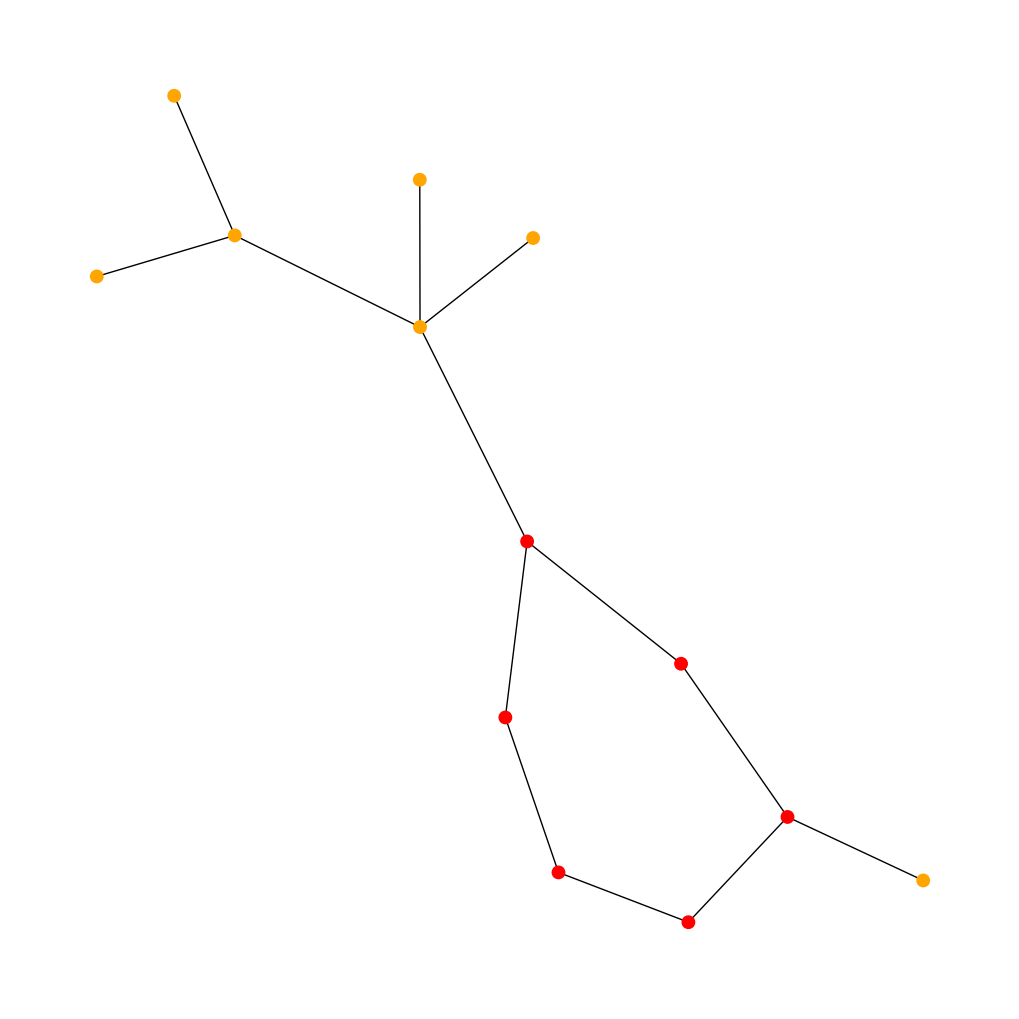

-----------Original Computational Graph with calculated Weights -----------


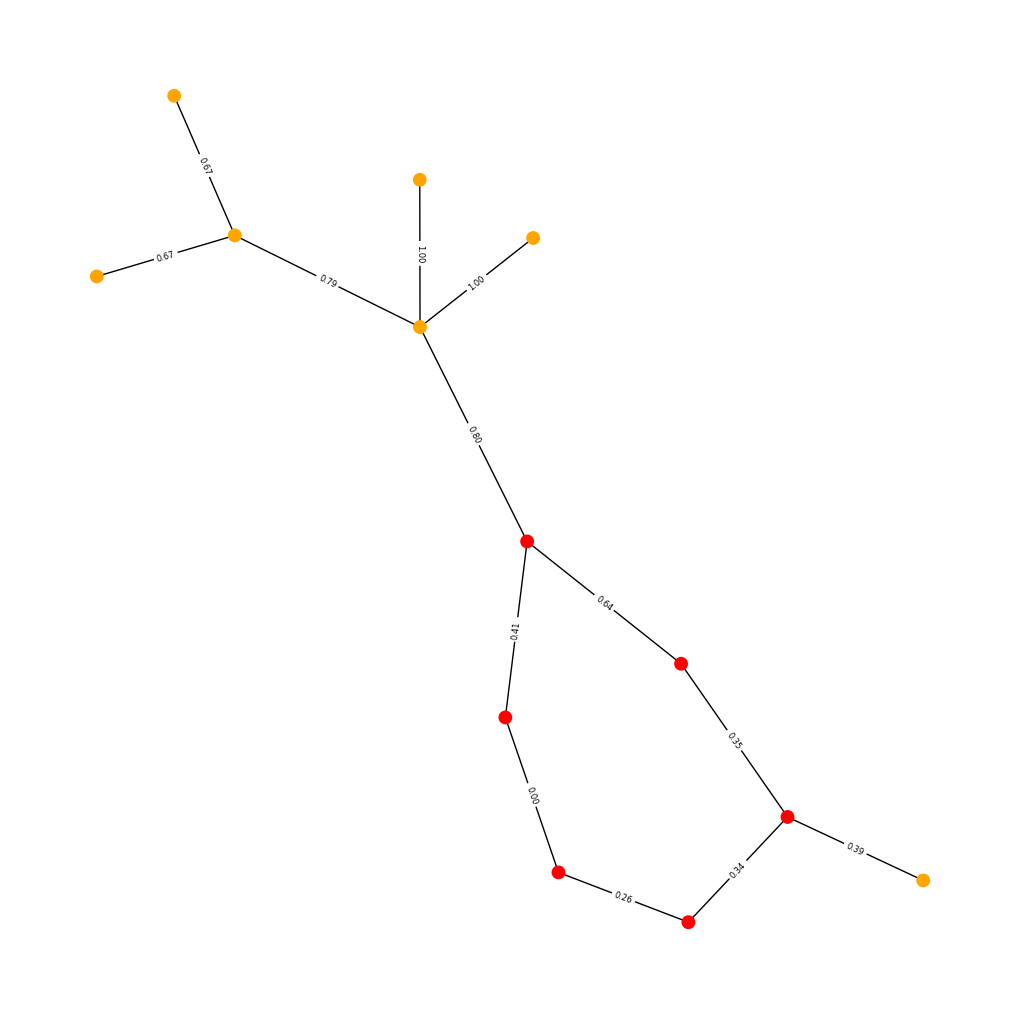

-----------------Top K Motif Graph-----------------


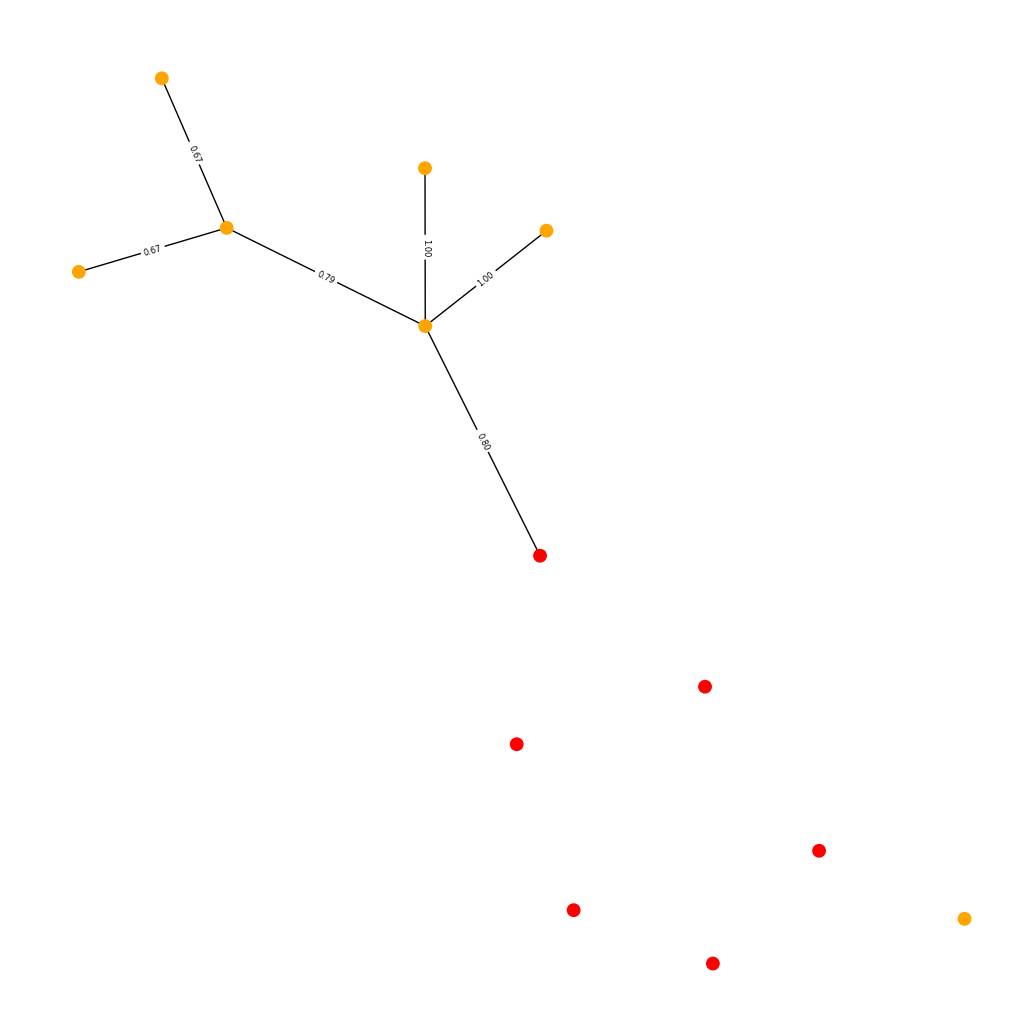

-----------------Ground Truth-----------------


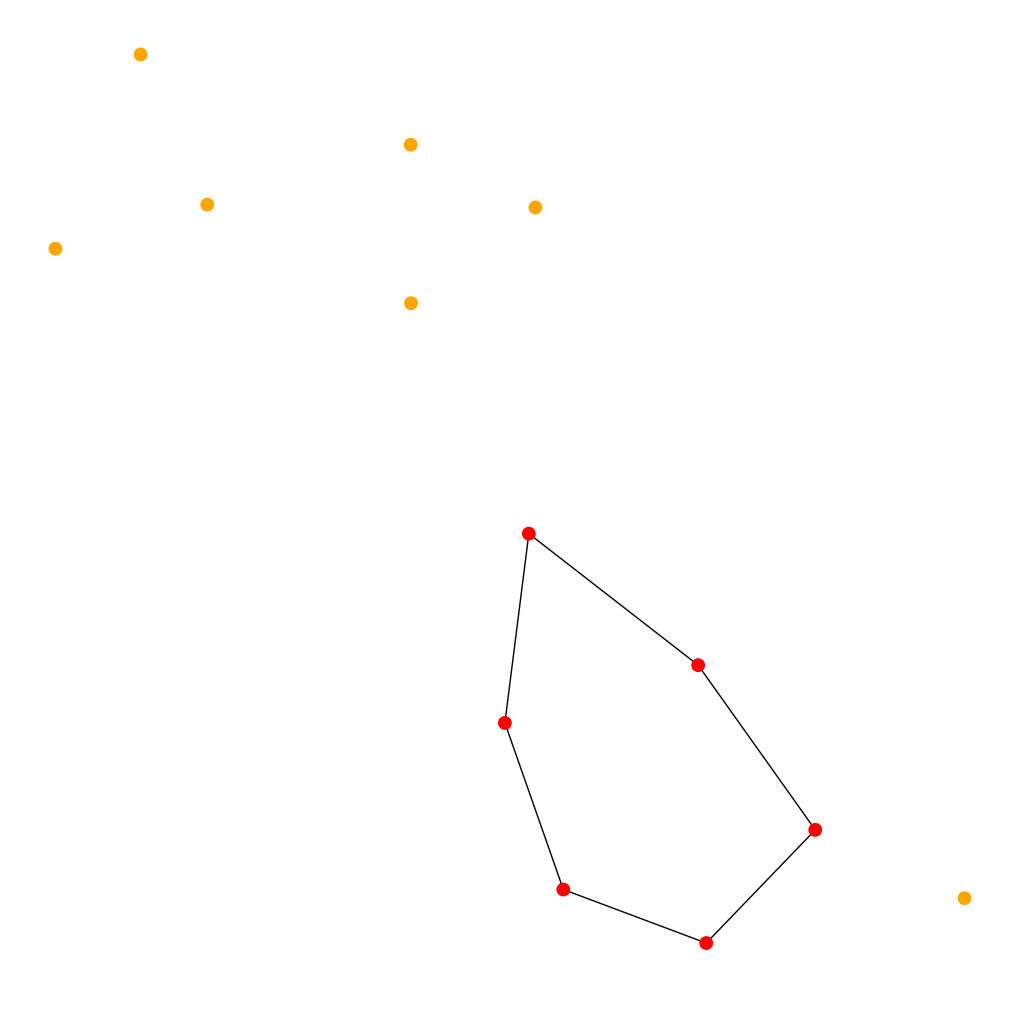

BinaryAUROC: 0.047619047619047616
roc_auc_score: 0.04761904761904763
Mean individual BinaryAUROC: 0.0476190485060215
AUC for random Node: 0.04761904761904763
Mean AUC for evaluation: 0.08741212521780928


In [15]:
importlib.reload(evaluation)

auc, ind_aucs, infTime = evaluation.evaluate(datasetName=dataset, mlp=mlp, downstreamTask=downstreamTask)

print(f"Mean AUC for evaluation: {auc}")

In [ ]:
importlib.reload(evaluation)

for i in range(32):
    auc, ind_aucs, infTime = evaluation.evaluate(datasetName=dataset, mlp=mlp, downstreamTask=downstreamTask, index=i)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img_dir = "explanations"
image_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith(".png")])

rows, cols = 4, 8
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for ax, img_path in zip(axes.flat, image_paths):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.savefig("grid_explanations.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
import wandb
wandb.finish()

In [10]:
import utils
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data

In [14]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Shapes")
graph_dataset_seed = 42
generator1 = torch.Generator().manual_seed(graph_dataset_seed)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(data, [0.8, 0.1, 0.1], generator1)

c:\Users\trist\anaconda3\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(


In [16]:
k = 5

data1 = data

printLoader = DataLoader([data1], 1, False)

temperature = 1

In [17]:
mlp.eval()
downstreamTask.eval()

w_ij = mlp.forward(downstreamTask, data1.x, data1.edge_index)

print(w_ij)

edge_ij = mlp.sampleGraph(w_ij)
print(edge_ij)

_, top_k_indices = torch.topk(edge_ij, k=k*2, largest=True)

mask = torch.zeros_like(edge_ij, dtype=torch.bool)
mask[top_k_indices] = True

sortedTopK, indices = torch.sort(top_k_indices)

edge_index_masked = data1.edge_index[:,mask]
weights_masked = edge_ij[sortedTopK]                # This is ordered by size

# edge_index_masked and weights_masked to display top 5 edges; data1.edge_index and w_ij to display original graph
Gs = Data(x=data1.x, edge_index=edge_index_masked, edge_attr=weights_masked)

#print(Gs.edge_attr)
#print(weights_masked)

print("-----------------Original Graph-----------------")

#pos = utils.plotGraph(data1, MUTAG=MUTAG)
pos = utils.plotGraphAll(data1, number_nodes=True, graph_task=True)

print("-----------------Sampled Graph-----------------")

#pos1 = utils.plotGraph(Gs, pos=pos, color_map=None, edge_weights=True, MUTAG=MUTAG)
pos1 = utils.plotGraphAll(Gs, pos=pos, number_nodes=True, graph_task=True, edge_weights=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4110x120 and 180x64)

In [18]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Shapes")
graph_dataset_seed = 42
generator1 = torch.Generator().manual_seed(graph_dataset_seed)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(data, [0.8, 0.1, 0.1], generator1)

c:\Users\trist\anaconda3\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(


In [23]:
import random
import evaluation
from torch_geometric.utils import k_hop_subgraph

motifNodesOriginal = [i for i in range(400,700,5)]

randomAUCNode = random.choice(motifNodesOriginal)
currentAUC = randomAUCNode

AUC of ROC: 0.9920886158943176
BinaryAUROC: 0.9920886075949367
roc_auc_score: 0.9920886075949368
0.9920886075949368


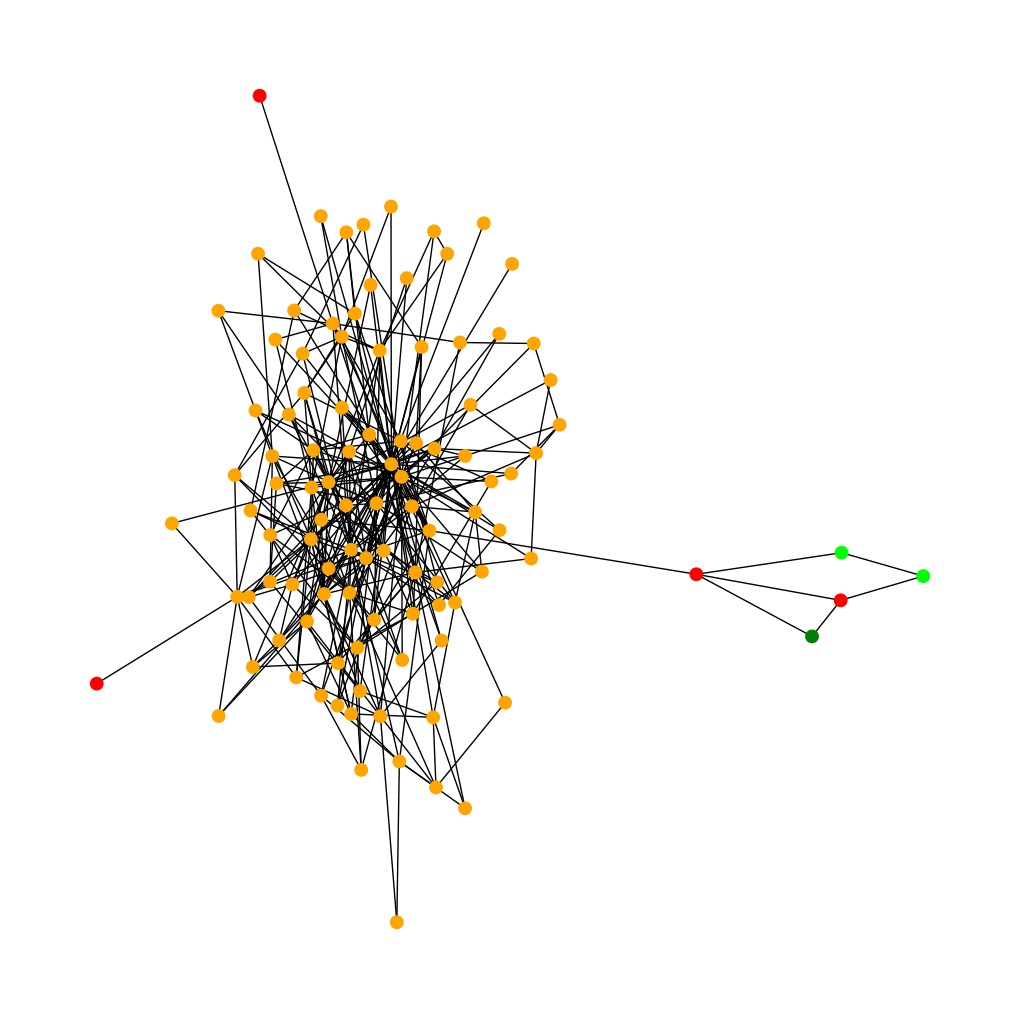

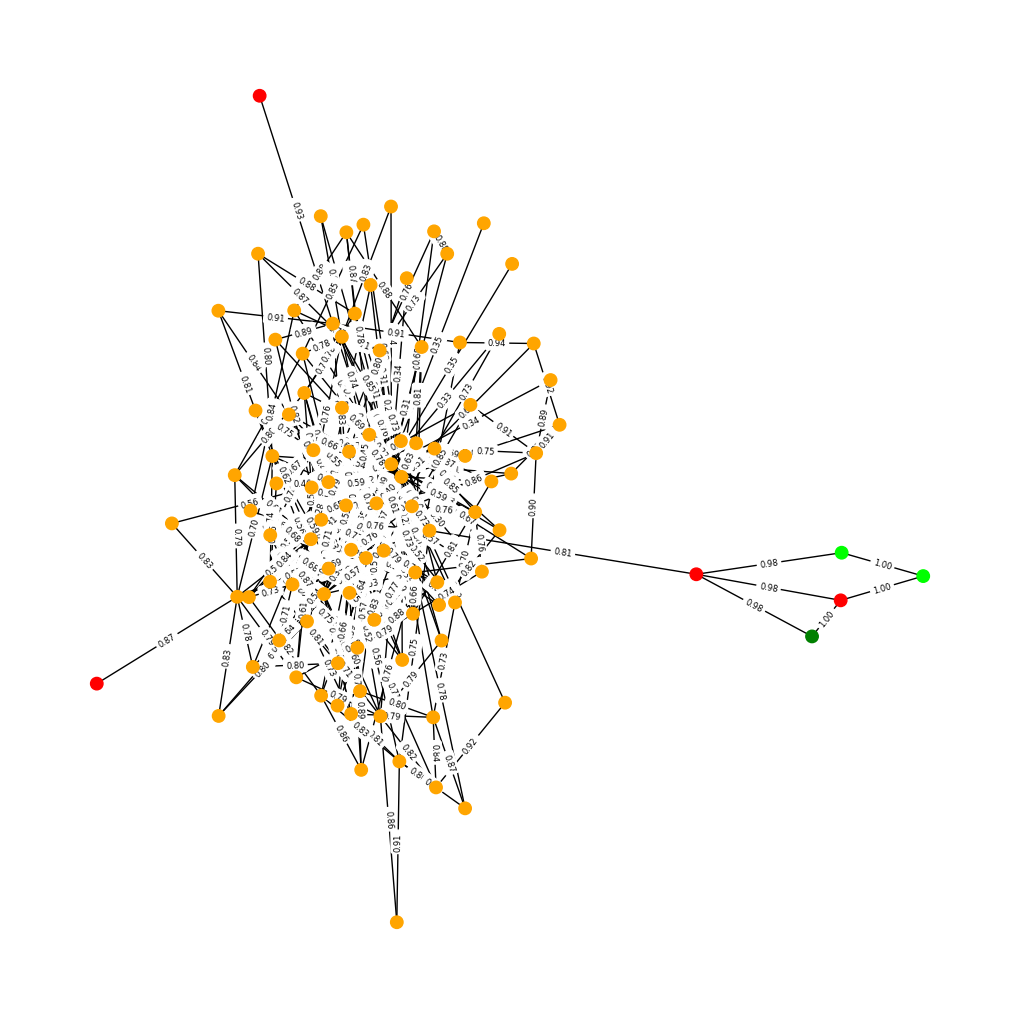

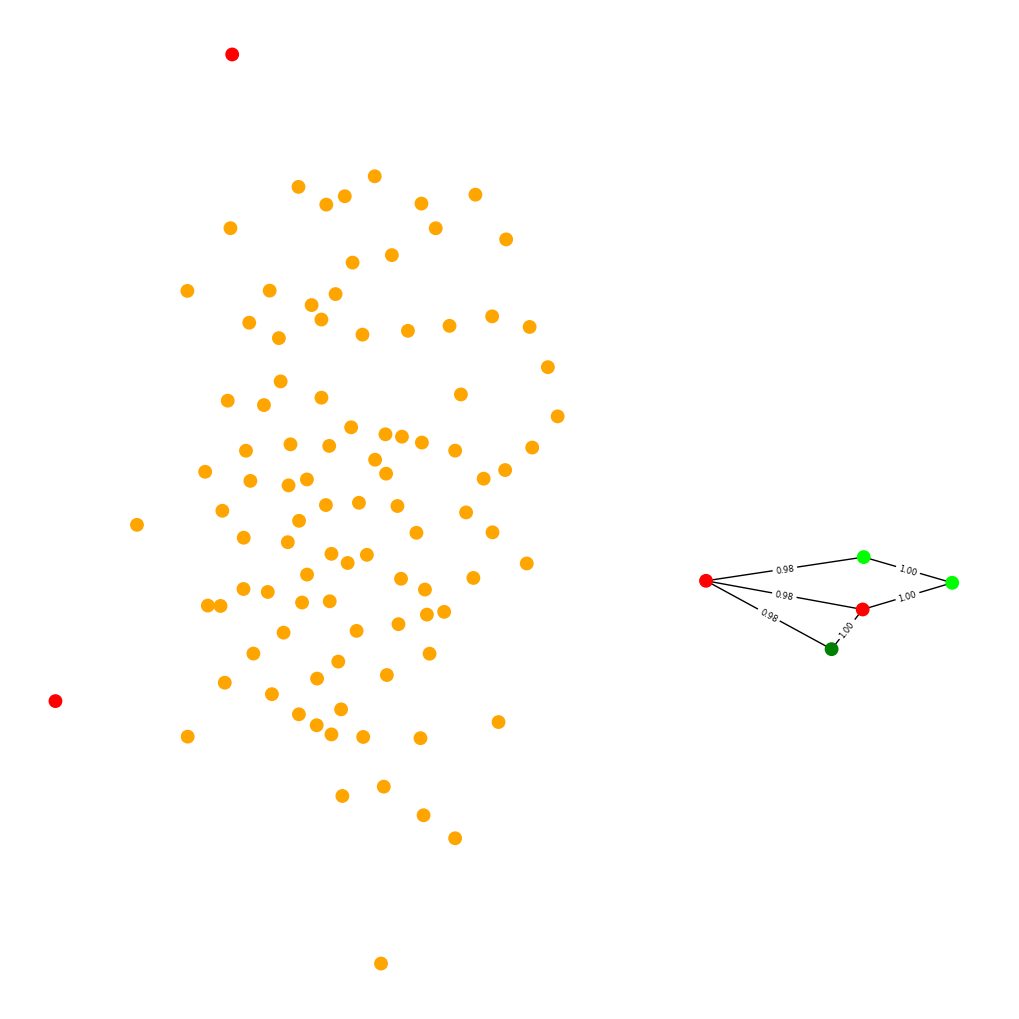

In [24]:
k = 6

mlp.eval()
downstreamTask.eval()

#AUCNode = [i for i in range(511,871,6)]
#AUCNode = [i for i in range(a[0].item(),a[len(a)-1]+1,6)]

#print(data.edge_index)

print(evaluation.evaluateNodeExplainerAUC(mlp, downstreamTask, data, data.edge_index, currentAUC, data.gt, k=k))

subset, edge_index_hop, mapping, edge_mask = k_hop_subgraph(node_idx=currentAUC, num_hops=3, edge_index=data.edge_index, relabel_nodes=True)

indexNodeToPred = (subset == currentAUC).nonzero().item()

G_hop = Data(x=data.x[subset], edge_index=edge_index_hop, y=data.y[subset])

pos = utils.plotGraphAll(G_hop)




w_ij = mlp.forward(downstreamTask, data.x[subset], edge_index_hop, indexNodeToPred)

# Min-Max Normalization. This works pretty well
weights_min = w_ij.min()
weights_max = w_ij.max()
weights_norm = (w_ij - weights_min) / (weights_max - weights_min)

#print(torch.unique(w_ij))
edge_ij = mlp.sampleGraph(w_ij, temperature)

## REMOVE IF SIGMOID WANTED
edge_ij = weights_norm


GraphSampled = Data(x=G_hop.x, edge_index=G_hop.edge_index, y=G_hop.y, edge_attr=edge_ij.detach())

pos = utils.plotGraphAll(GraphSampled, pos, edge_weights=True)


# Print topK edges
k = k * 2 if len(w_ij) >= k*2 else len(w_ij)
_, top_k_indices = torch.topk(edge_ij, k=k, largest=True)

mask = torch.zeros_like(edge_ij, dtype=torch.bool)
mask[top_k_indices] = True

sortedTopK, indices = torch.sort(top_k_indices)

edge_index_masked = G_hop.edge_index[:,mask]
weights_masked = edge_ij[sortedTopK]                # This is ordered by size

GtopK = Data(x=G_hop.x, edge_index=edge_index_masked, y=G_hop.y, edge_attr=weights_masked)

pos1 = utils.plotGraphAll(GtopK, pos=pos, color_map=None, edge_weights=True)